In [ ]:
import tweepy
import pandas as pd
import numpy as np
import re
from nltk.tokenize import TweetTokenizer

In [ ]:
access_key = "1242513200861655044-6CI2xllf2c4ajWcWhxTaXPDHk3jr6a"
access_secret = "sw1LYhAV6WQncMgrbmE8uEKWBggxWnFftaPxSbkaXhMvJ"

In [ ]:
#twiiter authentication
auth = tweepy.OAuthHandler(consumer_key="7UJbJE9RyNsdHXGctbkqiEM6B", consumer_secret="pc5apOR0d5BZeYim4thjAlkokgxLyeKNlXHnHHlGf0p46dwNeK")
auth.set_access_token(access_key, access_secret)
#creating an API object
api = tweepy.API(auth)

In [ ]:
#'sustainability'or'carbon emission'or'green house gas'or'ghg'or'cost-effectiveness'or'carbon footprint'or'carbon neutrality', 'methane'

In [ ]:
search_term = "Chevron, 'sustainability' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(5000)

sustai_twt = [tweet.text for tweet in tweets]

len(sustai_twt)

12

In [ ]:
search_term = "Chevron, 'carbon' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

em_twt = [tweet.text for tweet in tweets]

em_twt[0:5]
len(em_twt)

52

In [ ]:
search_term = "Chevron, 'methane' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

mthn_twt = [tweet.text for tweet in tweets]

len(mthn_twt)

33

In [ ]:
search_term = "Chevron, 'ghg' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

ghg_twt = [tweet.text for tweet in tweets]

ghg_twt[0:5]
len(ghg_twt)

3

In [ ]:
search_term = "Chevron, 'carbon footprint' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

cm_twt = [tweet.text for tweet in tweets]

cm_twt[0:5]
len(em_twt)

52

In [ ]:
search_term = "Chevron, 'energy' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2015-11-01').items(1000)

enrg_twt = [tweet.text for tweet in tweets]

enrg_twt[0:5]
len(enrg_twt)

298

In [ ]:
search_term = "Chevron, 'net zero' -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-11-01').items(1000)

nz_twt = [tweet.text for tweet in tweets]

enrg_twt[0:5]
len(enrg_twt)

298

In [ ]:
df = pd.DataFrame(data = sustai_twt,columns = ['Tweet'])
df1 = pd.DataFrame(data = em_twt,columns = ['Tweet'])
df2 = pd.DataFrame(data = mthn_twt,columns = ['Tweet'])
df3 = pd.DataFrame(data = ghg_twt,columns = ['Tweet'])
df4 = pd.DataFrame(data = cm_twt,columns = ['Tweet'])
df5 = pd.DataFrame(data = enrg_twt,columns = ['Tweet'])
df6 = pd.DataFrame(data = nz_twt,columns = ['Tweet'])

In [ ]:
final_df = pd.concat([df,df1,df2,df3,df4,df5,df6],axis = 0)

In [ ]:
final_df

,Tweet
0,Have a read through @Chevron's CSR Report and ...
1,@the_Notorious_I @johnpavlovitz @ksorbs So … w...
2,"@JonesHowdareyou 'Resilience NSW', not inspire..."
3,"@ExtinctionR 'Resilience NSW', let me guess, i..."
4,"@guardiannews 'Resilience NSW', let me guess, ..."
...,...
0,Interesting news from the @Chevron AGM. https:...
1,A large slice – though not a majority – of Che...
2,@Gevo_Inc Hope pat talks about the Chevron LOI...
3,Net-zero proposal gains significant support at...


### Preprocessing


In [ ]:
#Lowercase
final_df['Tweet'] = final_df.Tweet.str.lower()

In [ ]:
#URL links
final_df.Tweet = final_df.Tweet.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))

In [ ]:
final_df.Tweet = final_df.Tweet.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))

In [ ]:
#Placeholders link&videos
final_df.Tweet = final_df.Tweet.apply(lambda x: re.sub(r'{link}', '', x))
final_df.Tweet = final_df.Tweet.apply(lambda x: re.sub(r"\[video\]", '', x))

In [ ]:
#HTML reference characters
final_df.Tweet = final_df.Tweet.apply(lambda x: re.sub(r'&[a-z]+;', '', x))

In [ ]:
#remove @mentions
final_df.Tweet = final_df.Tweet.apply(lambda x:re.sub("@[A-Za-z0-9_]+","",x))


In [ ]:
#remove #hashtags
final_df.Tweet = final_df.Tweet.apply(lambda x:re.sub("#[A-Za-z0-9_]+","",x))


In [ ]:
#Non-letter characters
final_df.Tweet = final_df.Tweet.apply(lambda x: re.sub(r"[^a-z\s\(\-\:\)\\\/\];='#]", '', x))

In [ ]:
final_df

,Tweet
0,have a read through 's csr report and how the ...
1,so what happened to their multi-trillion d...
2,'resilience nsw' not inspired by the formerly...
3,'resilience nsw' let me guess inspired by the...
4,'resilience nsw' let me guess inspired by the...
...,...
0,interesting news from the agm
1,a large slice though not a majority of chevr...
2,hope pat talks about the chevron loi time fra...
3,net-zero proposal gains significant support at...


In [ ]:
#drop duplicated
final_df.drop_duplicates(inplace=True)

In [ ]:
final_df

,Tweet
0,have a read through 's csr report and how the ...
1,so what happened to their multi-trillion d...
2,'resilience nsw' not inspired by the formerly...
3,'resilience nsw' let me guess inspired by the...
4,'resilience nsw' let me guess inspired by the...
...,...
297,if congress called for an investigation by th...
0,interesting news from the agm
2,hope pat talks about the chevron loi time fra...
3,net-zero proposal gains significant support at...


### Sentiment Analyse

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 7.2 MB/s 


In [ ]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

In [ ]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
final_df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in final_df["Tweet"]]
final_df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in final_df["Tweet"]]
final_df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in final_df["Tweet"]]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
final_df = final_df[["Tweet", "Positive", 
             "Negative", "Neutral"]]
print(final_df.head())

                                               Tweet  Positive  Negative  \
0  have a read through 's csr report and how the ...     0.000     0.121   
1     so  what happened to their multi-trillion d...     0.225     0.000   
2   'resilience nsw' not inspired by the formerly...     0.000     0.193   
3   'resilience nsw' let me guess inspired by the...     0.198     0.000   
4   'resilience nsw' let me guess inspired by the...     0.198     0.000   

   Neutral  
0    0.879  
1    0.775  
2    0.807  
3    0.802  
4    0.802  


In [ ]:
x = sum(final_df['Positive'])
y = sum(final_df['Negative'])
z = sum(final_df['Neutral'])

def sentiment_score(a,b,c):
  if (a>b) and (a>c):
    print('Positive')
  elif (b>a) and (b>c):
    print('Negative')
  else:
    print('Neutral')

sentiment_score(x,y,z)

Neutral


In [ ]:
from matplotlib import pyplot as plt

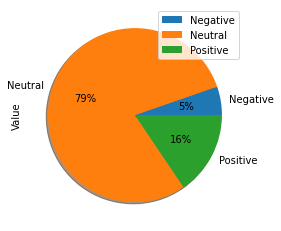

In [ ]:

df = pd.DataFrame({'Sentiment':['Positive','Negative','Neutral'],'Value':[x,y,z]})
df.groupby(['Sentiment']).sum().plot(kind='pie', y='Value', autopct='%1.0f%%',shadow = True)

### Word Cloud


In [ ]:
tknzr = TweetTokenizer()
final_df['Tokens'] = final_df['Tweet'].apply(tknzr.tokenize)

In [ ]:
final_df

,Tweet,Positive,Negative,Neutral,Tokens
0,have a read through 's csr report and how the ...,0.000,0.121,0.879,"[have, a, read, through, ', s, csr, report, an..."
1,so what happened to their multi-trillion d...,0.225,0.000,0.775,"[so, what, happened, to, their, multi-trillion..."
2,'resilience nsw' not inspired by the formerly...,0.000,0.193,0.807,"[', resilience, nsw, ', not, inspired, by, the..."
3,'resilience nsw' let me guess inspired by the...,0.198,0.000,0.802,"[', resilience, nsw, ', let, me, guess, inspir..."
4,'resilience nsw' let me guess inspired by the...,0.198,0.000,0.802,"[', resilience, nsw, ', let, me, guess, inspir..."
...,...,...,...,...,...
297,if congress called for an investigation by th...,0.116,0.000,0.884,"[if, congress, called, for, an, investigation,..."
0,interesting news from the agm,0.403,0.000,0.597,"[interesting, news, from, the, agm]"
2,hope pat talks about the chevron loi time fra...,0.112,0.000,0.888,"[hope, pat, talks, about, the, chevron, loi, t..."
3,net-zero proposal gains significant support at...,0.580,0.000,0.420,"[net-zero, proposal, gains, significant, suppo..."


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud

In [ ]:
word_cloud = WordCloud(collocations=False,background_color = 'white').generate(str(final_df.Tokens))

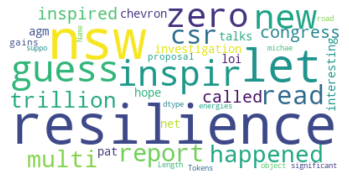

In [ ]:
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()